In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras.models as models
import keras.layers as layers
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

c:\Users\Andrey\anaconda3\envs\ML\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data & Manipulation

In [2]:
# load mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

NameError: name 'datagen' is not defined

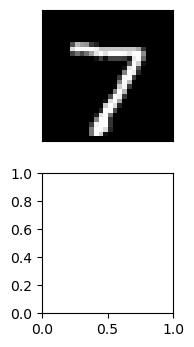

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    # plt.imshow(datagen.random_transform(x_test[i].reshape(28, 28, 1)).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Model Buildling

#### Layers

In [4]:
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
encoder.add(layers.MaxPooling2D((2, 2), padding='same'))
encoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
encoder.add(layers.MaxPooling2D((2, 2), padding='same'))
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


In [5]:

decoder = models.Sequential()
decoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(7, 7, 32)))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
decoder.add(layers.UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

decoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 1)         289       
                                                                 
Total params: 18,785
Trainable params: 18,785
Non-trai

In [7]:
autoencoder = models.Model(encoder.input, decoder(encoder.output))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

### Training


In [8]:
with tf.device('/gpu:0'):
    autoencoder.fit(x_train, x_train, batch_size=128,
                              steps_per_epoch=len(x_train) / 128, epochs=50, verbose=1)

Epoch 1/50
468/468 [==============================] - 35s 72ms/step - loss: 0.6896
Epoch 2/50
468/468 [==============================] - 37s 78ms/step - loss: 0.6805
Epoch 3/50
468/468 [==============================] - 33s 71ms/step - loss: 0.6655
Epoch 4/50
468/468 [==============================] - 33s 71ms/step - loss: 0.6378
Epoch 5/50
468/468 [==============================] - 32s 69ms/step - loss: 0.5943
Epoch 6/50
468/468 [==============================] - 33s 71ms/step - loss: 0.5546
Epoch 7/50
468/468 [==============================] - 33s 70ms/step - loss: 0.5273
Epoch 8/50
468/468 [==============================] - 32s 69ms/step - loss: 0.4998
Epoch 9/50
468/468 [==============================] - 34s 72ms/step - loss: 0.4668
Epoch 10/50
468/468 [==============================] - 34s 71ms/step - loss: 0.4263
Epoch 11/50
468/468 [==============================] - 35s 74ms/step - loss: 0.3776
Epoch 12/50
468/468 [==============================] - 36s 76ms/step - loss: 0.3249
E

313/313 [==============================] - 1s 3ms/step


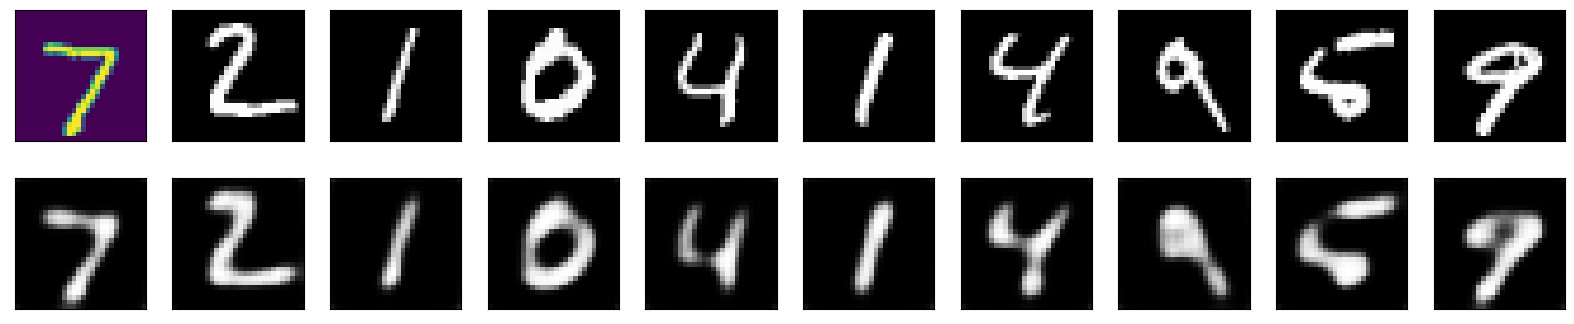

In [9]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)